<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span><ul class="toc-item"><li><span><a href="#Getting-Started" data-toc-modified-id="Getting-Started-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Getting Started</a></span><ul class="toc-item"><li><span><a href="#Starting-our-Data-Cleaning" data-toc-modified-id="Starting-our-Data-Cleaning-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Starting our Data Cleaning</a></span></li><li><span><a href="#Checking-Data-Types" data-toc-modified-id="Checking-Data-Types-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Checking Data Types</a></span></li><li><span><a href="#Variable-description" data-toc-modified-id="Variable-description-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Variable description</a></span></li></ul></li></ul></li><li><span><a href="#Exploring-the-Data" data-toc-modified-id="Exploring-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploring the Data</a></span></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Getting Started
You'll find the resulting dataset from your work in the Obtaining Data Lab stored within the file 'KC_house_data.csv'.

In the cells below:

Import pandas and set the standard alias.
Import numpy and set the standard alias.
Import matplotlib.pyplot and set the standard alias.
Import seaborn and set the alias sns (this is the standard alias for seaborn).
Use the ipython magic command to set all matplotlib visualizations to display inline in the notebook.
Load the dataset stored in the 'Lego_data_merged.csv' file into a DataFrame, df.
Inspect the head of the DataFrame to ensure everything loaded correctly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
# Now, load in the dataset and inspect the head to make sure everything loaded correctly
data = pd.read_csv("data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Starting our Data Cleaning
To start, you'll deal with the most obvious issue: data features with the wrong data encoding.

#### Checking Data Types
In the cell below, use the appropriate method to check the data type of each column.

#### Variable description
Here are some brief explanations of the variables used in this project :

- price : Price of the house, and prediction target in this project
-bedrooms : Number of bedrooms
-bathrooms : Number of bathrooms
-sqft_living : Square footage of the home
sqft_lot : Square footage of the lot
-floors : Total floors (levels) in house
-waterfront : House which has a view to a waterfront
-view : Has been viewed
-condition : How good the condition is ( Overall ). 1 indicates worn out property and 5 excellent
-grade : Overall grade given to the housing unit, based on -King County grading system. 1 poor ,13 excellent
-sqft_above : Square footage of house apart from basement
-sqft_basement: Square footage of the basement
-yr_built : Built Year
-yr_renovated : Year when house was renovated
-zipcode : zip
-lat : Latitude coordinate
-long : Longitude coordinate
-sqft_living15: Living room area in 2015(implies– some renovations) This might or might not have affected the lotsize area
-sqft_lot15 : LotSize area in 2015(implies– some renovations)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

From description we can infer that

-Avg price of house sold in King County, USA is $540088.
-Max Price of in King County, USA is $7700000.
-Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms
Avg area of house is 2079 Sqft with one house having 13540 Sqft. area

In [4]:
data.shape

(21597, 21)

In [5]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# waterfront value is null it most resembles when the property is not waterfront. Thus these NaN values can be replace with 0.
data.waterfront.fillna(0,inplace=True)
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# most likely 0 means not renovated
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

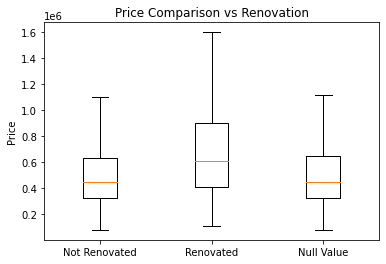

In [8]:
not_renovated = data.price[data['yr_renovated'] == 0]
renovated = data.price[(data['yr_renovated'] != 0) & (data['yr_renovated'].notna())]
null_ren = data.price[data['yr_renovated'].isna()]
plt.boxplot([not_renovated,renovated,null_ren],
            labels = ['Not Renovated','Renovated','Null Value'],showfliers = False)
plt.title('Price Comparison vs Renovation')
plt.ylabel('Price')
plt.show()

In [9]:
# we were right, so let's fill in the missing values to reflect the fact that
# the houses haven't been renovated

data.yr_renovated.fillna(0,inplace=True)
data.isna().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view             63
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [10]:
# assume missing values mean there is no view, so let's fill them in
data.view.fillna(0,inplace=True)

In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# check if the number of duplicates is 0
data.duplicated(subset = ["id", "date"]).sum() == 0

True

In [13]:
# Check the number of unique values in each column
unique_vals_list = []
for col in data.columns:
    unique_vals_list.append({'column': col, 'unique values': len(data[col].unique())})
pd.DataFrame(unique_vals_list)

,column,unique values
0,id,21420
1,date,372
2,price,3622
3,bedrooms,12
4,bathrooms,29
5,sqft_living,1034
6,sqft_lot,9776
7,floors,6
8,waterfront,2
9,view,5


In [14]:
data.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [15]:
data.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
...,...,...,...
21592,1530,1530,0.0
21593,2310,2310,0.0
21594,1020,1020,0.0
21595,1600,1600,0.0


In [16]:
# make a copy to drop "?" values to perform boolean comparison
test_df = data.copy()
test_df = test_df[test_df.sqft_basement != '?']
# needed a separate line of code for '0.0' as .astype(float) would error
test_df.sqft_basement[test_df.sqft_basement == '0.0'] = 0
# now I can convert datatype of the whole set to float
test_df.sqft_basement = test_df.sqft_basement.astype(float)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  float64
 9   view           21143 non-null  float64
 10  condition      21143 non-null  int64  
 11  grade          21143 non-null  int64  
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

Now let's see if this relationship between the 3 variables is consistent throughout the entire dataset

In [17]:
(test_df.sqft_basement != test_df.sqft_living - test_df.sqft_above).sum()

0


Thus we can conclude that any row with a value of '?' in the sqft_basement column can be replaced by adding the data from sqft_living and sqft_above.

In [18]:
difference = (data.loc[data["sqft_basement"] == '?', ["sqft_living"]
                   ]).values-(data.loc[data["sqft_basement"] == '?', ["sqft_above"]]).values
data.loc[data["sqft_basement"] == '?', ["sqft_basement"]] = difference

In [19]:
#change the dtype to int64 to be consistent with the rest of the 'sqft' variables
data.sqft_basement = data.sqft_basement.astype(float)
data.sqft_basement = data.sqft_basement.astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [23]:
data['date'] = data['date'].astype('datetime64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Exploring the Data

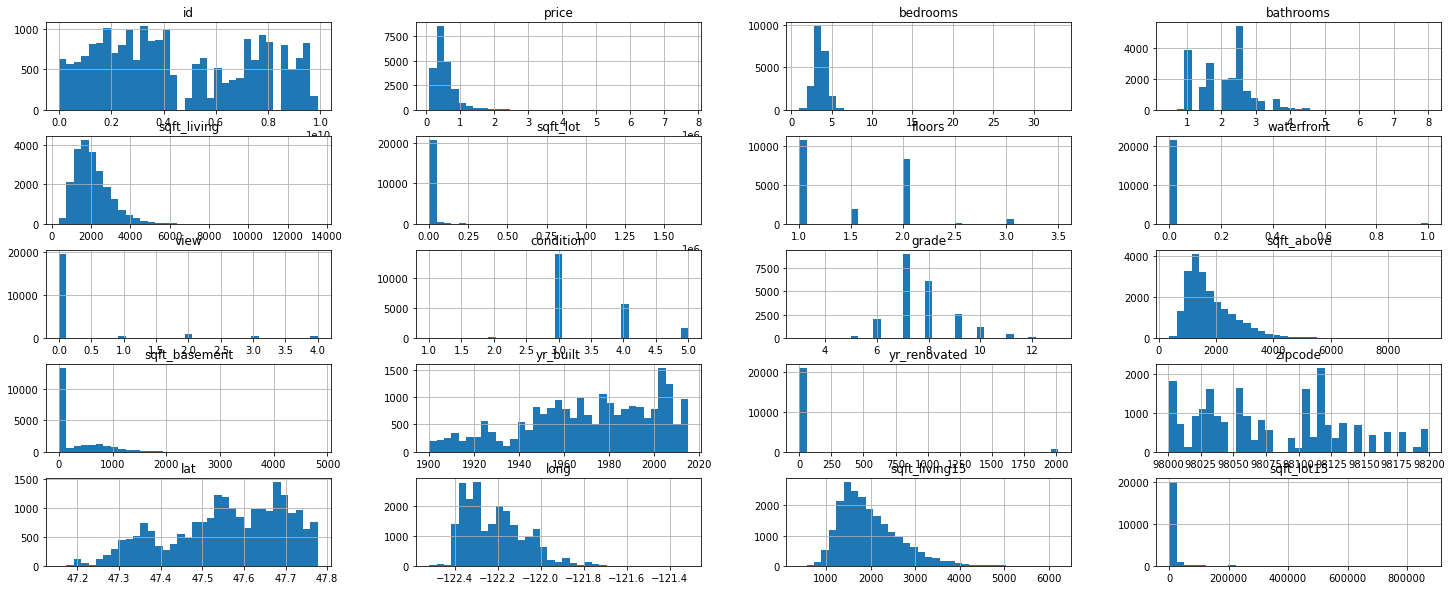

In [24]:
data.hist(figsize = (25,10),bins = 35)
plt.show()

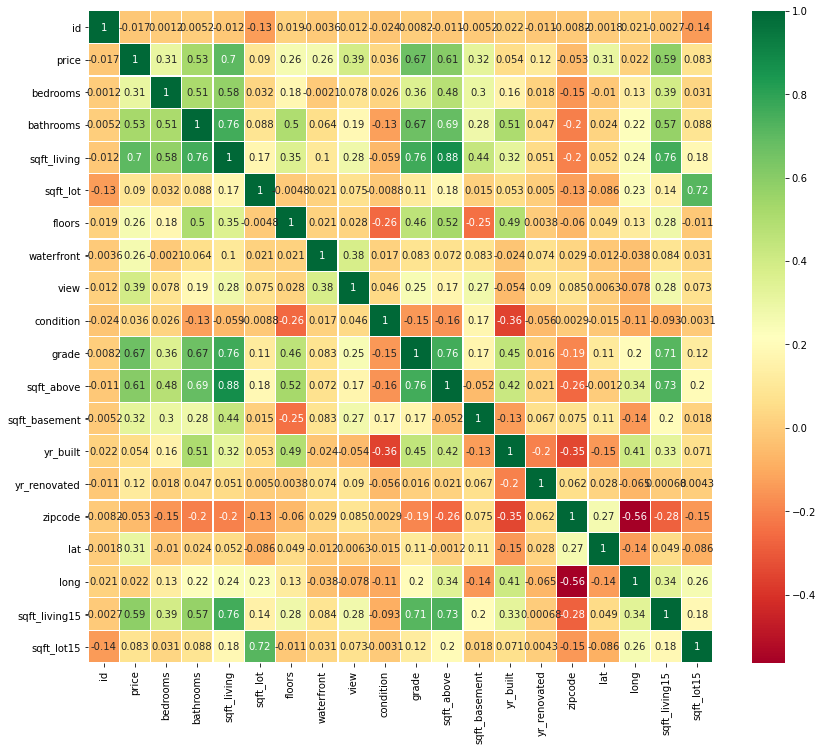

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(14,12)
plt.show()